In [1]:
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

## Analizamos cómo agrupar pagos por CIF_ID

In [2]:
df = pd.read_feather("../../../data/interim/pagos.feather")

In [3]:
df.head(5)

,COD_CIA,COD_SECC,FECHA_EQUIPO,NUM_SECU_POL,NUM_END,FECHA_VTO,FEC_PAGO,MONTO_PAGO,COD_COBRO,COD_SITUACION
0,2,90,2017-07,69739992,NaN,2017-12,2017-12,18.18,CC,CT
1,2,11,2017-01,349709968,NaN,2017-12,2017-12,6.10,TA,CT
2,2,11,2017-01,361729968,NaN,2017-12,2017-12,80.00,TA,CT
3,2,11,2017-01,362109968,NaN,2018-01,2017-12,105.00,TA,CT
4,2,11,2017-01,362729968,NaN,2017-12,2017-12,80.00,TA,CT


In [4]:
df.isna().mean().sort_index().plot.bar()

In [5]:
df.nunique()

COD_CIA                 4
COD_SECC               20
FECHA_EQUIPO           41
NUM_SECU_POL     19451918
NUM_END              2152
FECHA_VTO             201
FEC_PAGO               85
MONTO_PAGO         557156
COD_COBRO               8
COD_SITUACION           5
dtype: int64

Le agregamos CIF_ID a la tabla de acuerdo a lo que haya en la tabla de polizas

In [6]:
table = "VIGABT_POLIZAS.tsv"
location = "../../../data/raw"
sep = '\t'
encoding = 'latin1'
decimal = ','

In [7]:
chunks = pd.read_csv(f"{location}/{table}",
                     sep=sep,
                     encoding=encoding,
                     decimal=decimal,
                     chunksize=1000000,
                     iterator=True,
                     usecols = ["CIF_ID","NUM_SECU_POL"])
df_id_pol = pd.concat(chunks)

In [8]:
df_id_pol

,NUM_SECU_POL,CIF_ID
0,1754486179999,19264733.0
1,1754487779999,20526578.0
2,1754488299999,22162468.0
3,1754488439999,17484524.0
4,1754488459999,20964285.0
5,1754488699999,22299320.0
6,1754489119999,22301012.0
7,1754489249999,21511395.0
8,1754483839999,21015956.0
9,1754483869999,1536059.0


In [9]:
len(set(df_id_pol["NUM_SECU_POL"].unique()).intersection(set(df["NUM_SECU_POL"].unique()))) / len(df["NUM_SECU_POL"].unique())

0.6770198188168385

Hay un 67% de polizas en pagos. Analizamos los periodos que tenemos

In [10]:
df["FECHA_EQUIPO"].value_counts(dropna=False).sort_index()

2017-01     191761
2017-02      26787
2017-03        448
2017-04      27915
2017-05     139547
2017-06     152290
2017-07      78317
2017-08     115497
2017-09     132995
2017-10     116802
2017-11     152115
2017-12     852023
2018-01    2513017
2018-02    1518412
2018-03    1416155
2018-04    1317753
2018-05    2586798
2018-06    3425035
2018-07    1741521
2018-08    1719762
2018-09    1830628
2018-10    1998733
2018-11    1597445
2018-12    2881396
2019-01    1835414
2019-02    1259936
2019-03     742297
2019-04    1056553
2019-05    1892778
2019-06    2420963
2019-07     971903
2019-08     720727
2019-09     515477
2019-10     524193
2019-11     461920
2019-12     540233
2096-05          2
2099-03          1
2099-10          3
2099-11          1
2099-12         34
Name: FECHA_EQUIPO, dtype: int64

In [11]:
df["FEC_PAGO"].value_counts(dropna=False).sort_index()

1996-12          1
1997-01          1
1999-11          1
1999-12          3
2000-02         15
2000-03          3
2000-04          4
2000-05          4
2000-06          6
2001-08          1
2005-04          1
2010-02          3
2010-03          4
2010-05          1
2012-11          1
2013-09          1
2013-10          1
2013-12          2
2014-01          2
2014-02          1
2014-03          1
2014-05          8
2014-06          2
2014-07          1
2014-08          2
2014-09          4
2014-10          6
2014-11          5
2014-12          3
2015-01          8
2015-02         18
2015-03          5
2015-04          9
2015-05         12
2015-06         29
2015-07         15
2015-08         24
2015-09         24
2015-10         38
2015-11         35
2015-12         33
2016-01         34
2016-02         37
2016-03         20
2016-04         32
2016-05         66
2016-06        106
2016-07        156
2016-08         90
2016-09        104
2016-10        114
2016-11        363
2016-12     

In [12]:
df["FECHA_VTO"].value_counts(dropna=False).sort_index()

1996-12          1
1997-01          1
1999-06          1
1999-07          1
1999-10          1
1999-11          2
1999-12          2
2000-02          6
2000-03          6
2000-04          6
2000-05          8
2000-06          8
2001-02          1
2001-03          1
2001-07          2
2002-11          1
2003-07          1
2003-08          1
2003-11          1
2004-07          1
2005-03          1
2005-12          1
2006-03          2
2006-04          1
2006-05          3
2006-07          4
2006-10          1
2006-11          1
2007-01          1
2007-03          1
2007-04          1
2007-05          2
2007-07          1
2007-08        124
2007-09        201
2007-10        115
2007-11        212
2007-12         72
2008-01         78
2008-02         52
2008-03         10
2008-04         43
2008-05        130
2008-06        194
2008-07         64
2008-08        131
2008-09        127
2008-10         84
2008-11         76
2008-12         38
2009-01         95
2009-02         57
2009-03     

In [13]:
df["NUM_SECU_POL"].nunique()

19451918

Usamos un inner join para unirlas ya que no nos sirven los campos que no tengan cif_id

In [14]:
df = pd.merge(df, df_id_pol, on='NUM_SECU_POL', how='inner')

Guardamos la nueva tabla de pagos en feather

In [15]:
df.to_feather("../../../data/interim/pagos_con_cif_id.feather")

### *Polizas -> CIF_ID vs pagos -> CIF_ID*

In [16]:
df = pd.read_feather("../../../data/interim/pagos_con_cif_id.feather")

In [17]:
df_bajas = pd.read_feather("../../../data/processed/periodos_baja_x_cif_id.feather")

In [18]:
len(set(df_bajas["CIF_ID"]).intersection(set(df["CIF_ID"].unique()))) / len(df_bajas)

0.9933111286821611

**Revisamos los pagos**

In [19]:
df.nunique()

COD_CIA                 1
COD_SECC                1
FECHA_EQUIPO           36
NUM_SECU_POL     13169334
NUM_END                14
FECHA_VTO              31
FEC_PAGO               66
MONTO_PAGO         386746
COD_COBRO               6
COD_SITUACION           4
CIF_ID             984085
dtype: int64

Removemos pagos que esten por fuera del periodo a analizar

In [20]:
df = df.loc[~df["FECHA_VTO"].str.contains("20[12][067]")]

In [21]:
df = df.loc[~df["FECHA_VTO"].str.contains("2019-0[789]")]

In [22]:
df = df.loc[~df["FECHA_VTO"].str.contains("2019-1")]

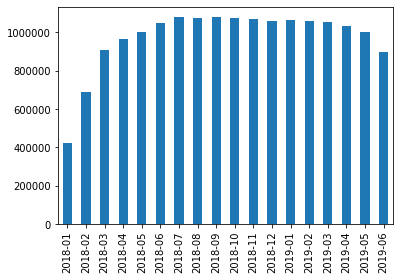

In [23]:
df["FECHA_VTO"].value_counts().sort_index().plot.bar()

Revisamos algunas estadisticas de nuevo

In [24]:
len(set(df_bajas["CIF_ID"]).intersection(set(df["CIF_ID"].unique()))) / len(df_bajas)

0.9898176104661043

In [25]:
df["NUM_END"].value_counts()

0.0     16849782
1.0       631473
2.0        85574
3.0        20363
4.0         5196
5.0         1615
6.0          607
7.0          275
8.0          137
9.0           82
10.0          67
11.0          31
12.0          30
13.0           4
Name: NUM_END, dtype: int64

In [26]:
df.drop(['COD_CIA', 'COD_SECC','NUM_END'], axis=1, inplace=True)

In [27]:
df.nunique()

FECHA_EQUIPO           36
NUM_SECU_POL     13049418
FECHA_VTO              18
FEC_PAGO               66
MONTO_PAGO         380784
COD_COBRO               6
COD_SITUACION           4
CIF_ID             979749
dtype: int64

### Generamos algunas variables adicionales

#### Diferencia entre fecha de pago y vencimiento
- [PAGO - VENCIMIENTO]

In [28]:
def lookup(s):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

df["FECHA_VTO"] = lookup(df["FECHA_VTO"])
df["FEC_PAGO"] = lookup(df["FEC_PAGO"])

In [34]:
import numpy as np
df["demora_pago"] = ((df["FEC_PAGO"] - df["FECHA_VTO"])/np.timedelta64(1, 'M')).astype("float")

In [35]:
df[["demora_pago","FECHA_VTO","FEC_PAGO"]] 

,demora_pago,FECHA_VTO,FEC_PAGO
0,0.000000,2018-02-01,2018-02-01
1,0.000000,2018-02-01,2018-02-01
2,0.000000,2018-02-01,2018-02-01
3,0.000000,2018-02-01,2018-02-01
4,1.018501,2018-03-01,2018-04-01
5,-1.018501,2018-02-01,2018-01-01
6,0.000000,2018-03-01,2018-03-01
7,0.000000,2018-03-01,2018-03-01
8,0.000000,2018-03-01,2018-03-01
9,0.000000,2018-03-01,2018-03-01


In [36]:
df["demora_pago"].value_counts()

 0.000000      12372723
 1.018501       1351168
-1.018501       1103969
 0.985647        845567
-0.985647        535225
 0.919937        253036
-0.919937        214330
 2.004148        189775
-2.004148         80303
 1.938438         52012
 3.022649         45691
 2.037003         33402
-3.022649         28357
-2.037003         23219
 2.956940         14745
 2.989794         14220
-1.938438         12432
-2.956940          9902
 2.924085          9854
 3.942586          8513
-4.008296          6594
 4.961087          6336
 6.965235          5407
-3.942586          4932
-5.026797          4856
-2.989794          4677
 4.008296          4626
-4.041151          3990
 5.026797          3829
-2.924085          3305
 5.979589          3144
 5.946734          2994
 7.983737          2297
-4.961087          2253
 4.041151          2250
 8.969383          2149
 9.987885          1644
 6.045299          1388
 7.030945          1170
-3.975441           976
 6.012444           961
 11.992033      

In [37]:
print(df["demora_pago"].min(),df["demora_pago"].max()) 

-202.9774738701 17.938766709788702


In [40]:
df[df["demora_pago"] > 17]

,FECHA_EQUIPO,NUM_SECU_POL,FECHA_VTO,FEC_PAGO,MONTO_PAGO,COD_COBRO,COD_SITUACION,CIF_ID,demora_pago
225610,2018-10,1766308499999,2018-01-01,2019-07-01,-171.72,PP,CT,22038973.0,17.938767


In [41]:
df[df["demora_pago"] < -200]

,FECHA_EQUIPO,NUM_SECU_POL,FECHA_VTO,FEC_PAGO,MONTO_PAGO,COD_COBRO,COD_SITUACION,CIF_ID,demora_pago
8707986,2018-09,1816195769999,2018-07-01,2001-08-01,1267.0,BA,CT,18467656.0,-202.977474


#### Revisamos COD_COBRO

In [42]:
df["COD_COBRO"].value_counts(dropna=False)

PP     7507305
TM     5351525
CC     2929896
BA     1728613
TA       61952
SJ       15943
NaN          2
Name: COD_COBRO, dtype: int64

Según el diccionario de datos TM/TA = Tarjeta así que los unificamos en TA

In [43]:
df.loc[df["COD_COBRO"]=="TM","COD_COBRO"] = "TA"

In [44]:
df["COD_COBRO"].value_counts(dropna=False)

PP     7507305
TA     5413477
CC     2929896
BA     1728613
SJ       15943
NaN          2
Name: COD_COBRO, dtype: int64

In [45]:
df.head()

,FECHA_EQUIPO,NUM_SECU_POL,FECHA_VTO,FEC_PAGO,MONTO_PAGO,COD_COBRO,COD_SITUACION,CIF_ID,demora_pago
0,2018-02,1759604659999,2018-02-01,2018-02-01,-583.0,CC,CT,3402804.0,0.000000
1,2018-02,1759604659999,2018-02-01,2018-02-01,-583.0,CC,CT,3402804.0,0.000000
2,2017-10,1759604659999,2018-02-01,2018-02-01,2896.0,TA,CT,3402804.0,0.000000
3,2017-10,1759604659999,2018-02-01,2018-02-01,2896.0,TA,CT,3402804.0,0.000000
4,2017-12,1762190589999,2018-03-01,2018-04-01,1490.0,PP,CT,22328711.0,1.018501


### *CHECKPOINT!*

In [46]:
df.reset_index(drop=True).to_feather("../../../data/interim/pagos_datediff_cif_id.feather")

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

df = pd.read_feather("../../../data/interim/pagos_datediff_cif_id.feather")

#### Creamos la variable periodo en lugar de fecha_vto para que coincida con el resto de las tablas

In [2]:
new_data = {fecha:pd.to_datetime(fecha).strftime('%Y-%m') for fecha in df["FECHA_VTO"].unique()}
new_data

{numpy.datetime64('2018-02-01T00:00:00.000000000'): '2018-02',
 numpy.datetime64('2018-03-01T00:00:00.000000000'): '2018-03',
 numpy.datetime64('2018-04-01T00:00:00.000000000'): '2018-04',
 numpy.datetime64('2018-06-01T00:00:00.000000000'): '2018-06',
 numpy.datetime64('2018-05-01T00:00:00.000000000'): '2018-05',
 numpy.datetime64('2018-01-01T00:00:00.000000000'): '2018-01',
 numpy.datetime64('2018-07-01T00:00:00.000000000'): '2018-07',
 numpy.datetime64('2019-02-01T00:00:00.000000000'): '2019-02',
 numpy.datetime64('2018-08-01T00:00:00.000000000'): '2018-08',
 numpy.datetime64('2019-04-01T00:00:00.000000000'): '2019-04',
 numpy.datetime64('2019-05-01T00:00:00.000000000'): '2019-05',
 numpy.datetime64('2019-06-01T00:00:00.000000000'): '2019-06',
 numpy.datetime64('2018-10-01T00:00:00.000000000'): '2018-10',
 numpy.datetime64('2019-01-01T00:00:00.000000000'): '2019-01',
 numpy.datetime64('2018-09-01T00:00:00.000000000'): '2018-09',
 numpy.datetime64('2018-11-01T00:00:00.000000000'): '20

In [3]:
df["FECHA_VTO"] = df["FECHA_VTO"].map(new_data)

In [4]:
data = {fecha:i + 1 for i,fecha in enumerate(sorted(df["FECHA_VTO"].unique()))}
data

{'2018-01': 1,
 '2018-02': 2,
 '2018-03': 3,
 '2018-04': 4,
 '2018-05': 5,
 '2018-06': 6,
 '2018-07': 7,
 '2018-08': 8,
 '2018-09': 9,
 '2018-10': 10,
 '2018-11': 11,
 '2018-12': 12,
 '2019-01': 13,
 '2019-02': 14,
 '2019-03': 15,
 '2019-04': 16,
 '2019-05': 17,
 '2019-06': 18}

In [5]:
df["periodo"] = df["FECHA_VTO"].map(data)

In [6]:
df.head()

,FECHA_EQUIPO,NUM_SECU_POL,FECHA_VTO,FEC_PAGO,MONTO_PAGO,COD_COBRO,COD_SITUACION,CIF_ID,demora_pago,periodo
0,2018-02,1759604659999,2018-02,2018-02-01,-583.0,CC,CT,3402804.0,0.000000,2
1,2018-02,1759604659999,2018-02,2018-02-01,-583.0,CC,CT,3402804.0,0.000000,2
2,2017-10,1759604659999,2018-02,2018-02-01,2896.0,TA,CT,3402804.0,0.000000,2
3,2017-10,1759604659999,2018-02,2018-02-01,2896.0,TA,CT,3402804.0,0.000000,2
4,2017-12,1762190589999,2018-03,2018-04-01,1490.0,PP,CT,22328711.0,1.018501,3


#### Empezamos a probar pivots por CIF_ID

In [7]:
df = df.rename(columns={"diferencia_vto_pago": "demora_pago"})

In [8]:
to_pivot = df[["CIF_ID","demora_pago","periodo","COD_COBRO","COD_SITUACION","MONTO_PAGO"]]

In [9]:
df_pagos_datediff = to_pivot.pivot_table(index=["CIF_ID"], columns=["periodo"], values=["demora_pago","MONTO_PAGO"], aggfunc="mean")

In [10]:
df_pagos_datediff.head()

MONTO_PAGO                                                       \
periodo         1       2            3       4       5       6       7    
CIF_ID                                                                    
571.0          NaN     NaN   739.000000   739.0   739.0   739.0   739.0   
573.0       1081.0  1081.0  1095.000000  1095.0  1095.0  1213.0  1213.0   
1009.0         NaN  1160.0  1160.000000  1160.0  1270.0  1270.0  1270.0   
1103.0      1242.0  1242.0  1221.333333  1324.0  1322.0    62.6  1505.0   
1313.0      3704.0  3704.0  3704.000000  3537.0  3537.0  3537.0  3572.0   

                                                                         \
periodo      8       9       10      11      12      13      14      15   
CIF_ID                                                                    
571.0     739.0   769.0   768.0   768.0   845.0   845.0   845.0   845.0   
573.0    1213.0  1258.0  1258.0  1258.0  1396.0  1396.0  1396.0  1497.0   
1009.0   1319.0  1319.0  1319.0  1484.0  1484.0  1484.0  1484.0  1484.0   
1103.0   1505.0  -146.0  3019.0  3019.0  3019.0  3255.0  3255.0  3255.0   
1313.0   3572.0  3572.0  3453.0  3453.0  3453.0  4105.0  4105.0  4105.0   

                                demora_pago                                \
periodo      16      17      18          1    2    3    4    5    6    7    
CIF_ID                                                                      
571.0     845.0   845.0  1484.0         NaN  NaN  0.0  0.0  0.0  0.0  0.0   
573.0    1497.0  1497.0  1542.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1009.0   1484.0  1729.0  1729.0         NaN  0.0  0.0  0.0  0.0  0.0  0.0   
1103.0   4368.0  4368.0  4368.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1313.0   3941.0  3941.0  3941.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                                
periodo   8    9    10   11   12   13   14   15   16   17   18  
CIF_ID                                                          
571.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
573.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1009.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1103.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1313.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [11]:
df_cods = to_pivot.pivot_table(index=["CIF_ID"], columns=["periodo","COD_SITUACION"], aggfunc="size")
df_cods.head()

periodo        1            2            3            4                5   \
COD_SITUACION  AM   CT  EP  AM   CT  EP  AM   CT  EP  AM   CT  EP  PP  AM   
CIF_ID                                                                      
571.0         NaN  NaN NaN NaN  NaN NaN NaN  1.0 NaN NaN  1.0 NaN NaN NaN   
573.0         NaN  1.0 NaN NaN  1.0 NaN NaN  1.0 NaN NaN  1.0 NaN NaN NaN   
1009.0        NaN  NaN NaN NaN  1.0 NaN NaN  1.0 NaN NaN  1.0 NaN NaN NaN   
1103.0        NaN  3.0 NaN NaN  3.0 NaN NaN  3.0 NaN NaN  3.0 NaN NaN NaN   
1313.0        NaN  1.0 NaN NaN  1.0 NaN NaN  1.0 NaN NaN  1.0 NaN NaN NaN   

periodo                     6                 7                8            \
COD_SITUACION   CT  EP  PP  AM   CT   EP  PP  AM   CT  EP  PP  AM   CT  EP   
CIF_ID                                                                       
571.0          1.0 NaN NaN NaN  1.0  NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN   
573.0          1.0 NaN NaN NaN  1.0  NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN   
1009.0         1.0 NaN NaN NaN  1.0  NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN   
1103.0         5.0 NaN NaN NaN  1.0  4.0 NaN NaN  1.0 NaN NaN NaN  2.0 NaN   
1313.0         1.0 NaN NaN NaN  1.0  NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN   

periodo            9                 10               11               12  \
COD_SITUACION  PP  AM   CT   EP  PP  AM   CT  EP  PP  AM   CT  EP  PP  AM   
CIF_ID                                                                      
571.0         NaN NaN  1.0  NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN   
573.0         NaN NaN  1.0  NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN   
1009.0        NaN NaN  1.0  NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN   
1103.0        NaN NaN  NaN  2.0 NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN   
1313.0        NaN NaN  1.0  NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN   

periodo                     13               14               15               \
COD_SITUACION   CT  EP  PP  AM   CT  EP  PP  AM   CT  EP  PP  AM   CT  EP  PP   
CIF_ID                                                                          
571.0          1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN   
573.0          1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN   
1009.0         1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN   
1103.0         1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN   
1313.0         1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN   

periodo        16               17               18               
COD_SITUACION  AM   CT  EP  PP  AM   CT  EP  PP  AM   CT  EP  PP  
CIF_ID                                                            
571.0         NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN  
573.0         NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN  
1009.0        NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN  
1103.0        NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN  
1313.0        NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN

In [12]:
df_codc = to_pivot.pivot_table(index=["CIF_ID"], columns=["periodo","COD_COBRO"], aggfunc="size")
df_codc.head()

periodo    1                     2                     3                     \
COD_COBRO  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA   
CIF_ID                                                                        
571.0     NaN  NaN NaN NaN  NaN NaN  NaN NaN NaN  NaN NaN  NaN NaN NaN  1.0   
573.0     NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1009.0    NaN  NaN NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1103.0    NaN  3.0 NaN NaN  NaN NaN  3.0 NaN NaN  NaN NaN  3.0 NaN NaN  NaN   
1313.0    NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   

periodo    4                     5                     6                     \
COD_COBRO  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA   
CIF_ID                                                                        
571.0     NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   
573.0     NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1009.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1103.0    NaN  3.0 NaN NaN  NaN NaN  5.0 NaN NaN  NaN NaN  5.0 NaN NaN  NaN   
1313.0    NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   

periodo    7                     8                     9                     \
COD_COBRO  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA   
CIF_ID                                                                        
571.0     NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   
573.0     NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1009.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1103.0    NaN  1.0 NaN NaN  NaN NaN  2.0 NaN NaN  NaN NaN  2.0 NaN NaN  NaN   
1313.0    NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   

periodo    10                    11                    12                    \
COD_COBRO  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA   
CIF_ID                                                                        
571.0     NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   
573.0     NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1009.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1103.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1313.0    NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   

periodo    13                    14                    15                    \
COD_COBRO  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA   
CIF_ID                                                                        
571.0     NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   
573.0     NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1009.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1103.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1313.0    NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   

periodo    16                    17                    18                    
COD_COBRO  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA  
CIF_ID                                                                       
571.0     NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0  
573.0     NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN  
1009.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN  
1103.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN  
1313.0    NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0

*Formateamos los DataFrames para unirlos en uno solo*

In [13]:
df_pagos_datediff = pd.DataFrame(df_pagos_datediff.to_records())
df_pagos_datediff.head()

,CIF_ID,"('MONTO_PAGO', 1)","('MONTO_PAGO', 2)","('MONTO_PAGO', 3)","('MONTO_PAGO', 4)","('MONTO_PAGO', 5)","('MONTO_PAGO', 6)","('MONTO_PAGO', 7)","('MONTO_PAGO', 8)","('MONTO_PAGO', 9)","('MONTO_PAGO', 10)","('MONTO_PAGO', 11)","('MONTO_PAGO', 12)","('MONTO_PAGO', 13)","('MONTO_PAGO', 14)","('MONTO_PAGO', 15)","('MONTO_PAGO', 16)","('MONTO_PAGO', 17)","('MONTO_PAGO', 18)","('demora_pago', 1)","('demora_pago', 2)","('demora_pago', 3)","('demora_pago', 4)","('demora_pago', 5)","('demora_pago', 6)","('demora_pago', 7)","('demora_pago', 8)","('demora_pago', 9)","('demora_pago', 10)","('demora_pago', 11)","('demora_pago', 12)","('demora_pago', 13)","('demora_pago', 14)","('demora_pago', 15)","('demora_pago', 16)","('demora_pago', 17)","('demora_pago', 18)"
0,571.0,NaN,NaN,739.000000,739.0,739.0,739.0,739.0,739.0,769.0,768.0,768.0,845.0,845.0,845.0,845.0,845.0,845.0,1484.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,573.0,1081.0,1081.0,1095.000000,1095.0,1095.0,1213.0,1213.0,1213.0,1258.0,1258.0,1258.0,1396.0,1396.0,1396.0,1497.0,1497.0,1497.0,1542.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1009.0,NaN,1160.0,1160.000000,1160.0,1270.0,1270.0,1270.0,1319.0,1319.0,1319.0,1484.0,1484.0,1484.0,1484.0,1484.0,1484.0,1729.0,1729.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1103.0,1242.0,1242.0,1221.333333,1324.0,1322.0,62.6,1505.0,1505.0,-146.0,3019.0,3019.0,3019.0,3255.0,3255.0,3255.0,4368.0,4368.0,4368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1313.0,3704.0,3704.0,3704.000000,3537.0,3537.0,3537.0,3572.0,3572.0,3572.0,3453.0,3453.0,3453.0,4105.0,4105.0,4105.0,3941.0,3941.0,3941.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_cods = pd.DataFrame(df_cods.to_records())
df_cods.head()

,CIF_ID,"(1, 'AM')","(1, 'CT')","(1, 'EP')","(2, 'AM')","(2, 'CT')","(2, 'EP')","(3, 'AM')","(3, 'CT')","(3, 'EP')","(4, 'AM')","(4, 'CT')","(4, 'EP')","(4, 'PP')","(5, 'AM')","(5, 'CT')","(5, 'EP')","(5, 'PP')","(6, 'AM')","(6, 'CT')","(6, 'EP')","(6, 'PP')","(7, 'AM')","(7, 'CT')","(7, 'EP')","(7, 'PP')","(8, 'AM')","(8, 'CT')","(8, 'EP')","(8, 'PP')","(9, 'AM')","(9, 'CT')","(9, 'EP')","(9, 'PP')","(10, 'AM')","(10, 'CT')","(10, 'EP')","(10, 'PP')","(11, 'AM')","(11, 'CT')","(11, 'EP')","(11, 'PP')","(12, 'AM')","(12, 'CT')","(12, 'EP')","(12, 'PP')","(13, 'AM')","(13, 'CT')","(13, 'EP')","(13, 'PP')","(14, 'AM')","(14, 'CT')","(14, 'EP')","(14, 'PP')","(15, 'AM')","(15, 'CT')","(15, 'EP')","(15, 'PP')","(16, 'AM')","(16, 'CT')","(16, 'EP')","(16, 'PP')","(17, 'AM')","(17, 'CT')","(17, 'EP')","(17, 'PP')","(18, 'AM')","(18, 'CT')","(18, 'EP')","(18, 'PP')"
0,571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,573.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
2,1009.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3,1103.0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
4,1313.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [15]:
df_codc = pd.DataFrame(df_codc.to_records())
df_codc.head()

,CIF_ID,"(1, 'BA')","(1, 'CC')","(1, 'PP')","(1, 'SJ')","(1, 'TA')","(2, 'BA')","(2, 'CC')","(2, 'PP')","(2, 'SJ')","(2, 'TA')","(3, 'BA')","(3, 'CC')","(3, 'PP')","(3, 'SJ')","(3, 'TA')","(4, 'BA')","(4, 'CC')","(4, 'PP')","(4, 'SJ')","(4, 'TA')","(5, 'BA')","(5, 'CC')","(5, 'PP')","(5, 'SJ')","(5, 'TA')","(6, 'BA')","(6, 'CC')","(6, 'PP')","(6, 'SJ')","(6, 'TA')","(7, 'BA')","(7, 'CC')","(7, 'PP')","(7, 'SJ')","(7, 'TA')","(8, 'BA')","(8, 'CC')","(8, 'PP')","(8, 'SJ')","(8, 'TA')","(9, 'BA')","(9, 'CC')","(9, 'PP')","(9, 'SJ')","(9, 'TA')","(10, 'BA')","(10, 'CC')","(10, 'PP')","(10, 'SJ')","(10, 'TA')","(11, 'BA')","(11, 'CC')","(11, 'PP')","(11, 'SJ')","(11, 'TA')","(12, 'BA')","(12, 'CC')","(12, 'PP')","(12, 'SJ')","(12, 'TA')","(13, 'BA')","(13, 'CC')","(13, 'PP')","(13, 'SJ')","(13, 'TA')","(14, 'BA')","(14, 'CC')","(14, 'PP')","(14, 'SJ')","(14, 'TA')","(15, 'BA')","(15, 'CC')","(15, 'PP')","(15, 'SJ')","(15, 'TA')","(16, 'BA')","(16, 'CC')","(16, 'PP')","(16, 'SJ')","(16, 'TA')","(17, 'BA')","(17, 'CC')","(17, 'PP')","(17, 'SJ')","(17, 'TA')","(18, 'BA')","(18, 'CC')","(18, 'PP')","(18, 'SJ')","(18, 'TA')"
0,571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
1,573.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1009.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,1103.0,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,1313.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0


In [16]:
len(df_codc) == len(df_cods) == len(df_pagos_datediff)

True

In [17]:
len(df_cods)

979749

### Renombramos las columnas

In [18]:
df_codc.columns

Index(['CIF_ID', '(1, 'BA')', '(1, 'CC')', '(1, 'PP')', '(1, 'SJ')',
       '(1, 'TA')', '(2, 'BA')', '(2, 'CC')', '(2, 'PP')', '(2, 'SJ')',
       '(2, 'TA')', '(3, 'BA')', '(3, 'CC')', '(3, 'PP')', '(3, 'SJ')',
       '(3, 'TA')', '(4, 'BA')', '(4, 'CC')', '(4, 'PP')', '(4, 'SJ')',
       '(4, 'TA')', '(5, 'BA')', '(5, 'CC')', '(5, 'PP')', '(5, 'SJ')',
       '(5, 'TA')', '(6, 'BA')', '(6, 'CC')', '(6, 'PP')', '(6, 'SJ')',
       '(6, 'TA')', '(7, 'BA')', '(7, 'CC')', '(7, 'PP')', '(7, 'SJ')',
       '(7, 'TA')', '(8, 'BA')', '(8, 'CC')', '(8, 'PP')', '(8, 'SJ')',
       '(8, 'TA')', '(9, 'BA')', '(9, 'CC')', '(9, 'PP')', '(9, 'SJ')',
       '(9, 'TA')', '(10, 'BA')', '(10, 'CC')', '(10, 'PP')', '(10, 'SJ')',
       '(10, 'TA')', '(11, 'BA')', '(11, 'CC')', '(11, 'PP')', '(11, 'SJ')',
       '(11, 'TA')', '(12, 'BA')', '(12, 'CC')', '(12, 'PP')', '(12, 'SJ')',
       '(12, 'TA')', '(13, 'BA')', '(13, 'CC')', '(13, 'PP')', '(13, 'SJ')',
       '(13, 'TA')', '(14, 'BA')', '(14, 'CC')',

In [19]:
df_codc = df_codc.rename(columns=lambda x: x.replace("(","").replace(")","").replace(", ","_COBRO_").replace("'",""))

In [20]:
df_codc.columns

Index(['CIF_ID', '1_COBRO_BA', '1_COBRO_CC', '1_COBRO_PP', '1_COBRO_SJ',
       '1_COBRO_TA', '2_COBRO_BA', '2_COBRO_CC', '2_COBRO_PP', '2_COBRO_SJ',
       '2_COBRO_TA', '3_COBRO_BA', '3_COBRO_CC', '3_COBRO_PP', '3_COBRO_SJ',
       '3_COBRO_TA', '4_COBRO_BA', '4_COBRO_CC', '4_COBRO_PP', '4_COBRO_SJ',
       '4_COBRO_TA', '5_COBRO_BA', '5_COBRO_CC', '5_COBRO_PP', '5_COBRO_SJ',
       '5_COBRO_TA', '6_COBRO_BA', '6_COBRO_CC', '6_COBRO_PP', '6_COBRO_SJ',
       '6_COBRO_TA', '7_COBRO_BA', '7_COBRO_CC', '7_COBRO_PP', '7_COBRO_SJ',
       '7_COBRO_TA', '8_COBRO_BA', '8_COBRO_CC', '8_COBRO_PP', '8_COBRO_SJ',
       '8_COBRO_TA', '9_COBRO_BA', '9_COBRO_CC', '9_COBRO_PP', '9_COBRO_SJ',
       '9_COBRO_TA', '10_COBRO_BA', '10_COBRO_CC', '10_COBRO_PP',
       '10_COBRO_SJ', '10_COBRO_TA', '11_COBRO_BA', '11_COBRO_CC',
       '11_COBRO_PP', '11_COBRO_SJ', '11_COBRO_TA', '12_COBRO_BA',
       '12_COBRO_CC', '12_COBRO_PP', '12_COBRO_SJ', '12_COBRO_TA',
       '13_COBRO_BA', '13_COBRO_CC', '13_COB

In [21]:
df_cods.columns

Index(['CIF_ID', '(1, 'AM')', '(1, 'CT')', '(1, 'EP')', '(2, 'AM')',
       '(2, 'CT')', '(2, 'EP')', '(3, 'AM')', '(3, 'CT')', '(3, 'EP')',
       '(4, 'AM')', '(4, 'CT')', '(4, 'EP')', '(4, 'PP')', '(5, 'AM')',
       '(5, 'CT')', '(5, 'EP')', '(5, 'PP')', '(6, 'AM')', '(6, 'CT')',
       '(6, 'EP')', '(6, 'PP')', '(7, 'AM')', '(7, 'CT')', '(7, 'EP')',
       '(7, 'PP')', '(8, 'AM')', '(8, 'CT')', '(8, 'EP')', '(8, 'PP')',
       '(9, 'AM')', '(9, 'CT')', '(9, 'EP')', '(9, 'PP')', '(10, 'AM')',
       '(10, 'CT')', '(10, 'EP')', '(10, 'PP')', '(11, 'AM')', '(11, 'CT')',
       '(11, 'EP')', '(11, 'PP')', '(12, 'AM')', '(12, 'CT')', '(12, 'EP')',
       '(12, 'PP')', '(13, 'AM')', '(13, 'CT')', '(13, 'EP')', '(13, 'PP')',
       '(14, 'AM')', '(14, 'CT')', '(14, 'EP')', '(14, 'PP')', '(15, 'AM')',
       '(15, 'CT')', '(15, 'EP')', '(15, 'PP')', '(16, 'AM')', '(16, 'CT')',
       '(16, 'EP')', '(16, 'PP')', '(17, 'AM')', '(17, 'CT')', '(17, 'EP')',
       '(17, 'PP')', '(18, 'AM')', '

In [22]:
df_cods = df_cods.rename(columns=lambda x: x.replace("(","").replace(")","").replace(", ","_SITUACION_").replace("'",""))

In [23]:
df_cods.columns

Index(['CIF_ID', '1_SITUACION_AM', '1_SITUACION_CT', '1_SITUACION_EP',
       '2_SITUACION_AM', '2_SITUACION_CT', '2_SITUACION_EP', '3_SITUACION_AM',
       '3_SITUACION_CT', '3_SITUACION_EP', '4_SITUACION_AM', '4_SITUACION_CT',
       '4_SITUACION_EP', '4_SITUACION_PP', '5_SITUACION_AM', '5_SITUACION_CT',
       '5_SITUACION_EP', '5_SITUACION_PP', '6_SITUACION_AM', '6_SITUACION_CT',
       '6_SITUACION_EP', '6_SITUACION_PP', '7_SITUACION_AM', '7_SITUACION_CT',
       '7_SITUACION_EP', '7_SITUACION_PP', '8_SITUACION_AM', '8_SITUACION_CT',
       '8_SITUACION_EP', '8_SITUACION_PP', '9_SITUACION_AM', '9_SITUACION_CT',
       '9_SITUACION_EP', '9_SITUACION_PP', '10_SITUACION_AM',
       '10_SITUACION_CT', '10_SITUACION_EP', '10_SITUACION_PP',
       '11_SITUACION_AM', '11_SITUACION_CT', '11_SITUACION_EP',
       '11_SITUACION_PP', '12_SITUACION_AM', '12_SITUACION_CT',
       '12_SITUACION_EP', '12_SITUACION_PP', '13_SITUACION_AM',
       '13_SITUACION_CT', '13_SITUACION_EP', '13_SITUACION

In [24]:
df_pagos_datediff.columns

Index(['CIF_ID', '('MONTO_PAGO', 1)', '('MONTO_PAGO', 2)', '('MONTO_PAGO', 3)',
       '('MONTO_PAGO', 4)', '('MONTO_PAGO', 5)', '('MONTO_PAGO', 6)',
       '('MONTO_PAGO', 7)', '('MONTO_PAGO', 8)', '('MONTO_PAGO', 9)',
       '('MONTO_PAGO', 10)', '('MONTO_PAGO', 11)', '('MONTO_PAGO', 12)',
       '('MONTO_PAGO', 13)', '('MONTO_PAGO', 14)', '('MONTO_PAGO', 15)',
       '('MONTO_PAGO', 16)', '('MONTO_PAGO', 17)', '('MONTO_PAGO', 18)',
       '('demora_pago', 1)', '('demora_pago', 2)', '('demora_pago', 3)',
       '('demora_pago', 4)', '('demora_pago', 5)', '('demora_pago', 6)',
       '('demora_pago', 7)', '('demora_pago', 8)', '('demora_pago', 9)',
       '('demora_pago', 10)', '('demora_pago', 11)', '('demora_pago', 12)',
       '('demora_pago', 13)', '('demora_pago', 14)', '('demora_pago', 15)',
       '('demora_pago', 16)', '('demora_pago', 17)', '('demora_pago', 18)'],
      dtype='object')

In [25]:
df_pagos_datediff = df_pagos_datediff.rename(columns=lambda x: x.replace("(","").replace(")","").replace(", ","_").replace("'",""))

In [26]:
df_pagos_datediff.columns

Index(['CIF_ID', 'MONTO_PAGO_1', 'MONTO_PAGO_2', 'MONTO_PAGO_3',
       'MONTO_PAGO_4', 'MONTO_PAGO_5', 'MONTO_PAGO_6', 'MONTO_PAGO_7',
       'MONTO_PAGO_8', 'MONTO_PAGO_9', 'MONTO_PAGO_10', 'MONTO_PAGO_11',
       'MONTO_PAGO_12', 'MONTO_PAGO_13', 'MONTO_PAGO_14', 'MONTO_PAGO_15',
       'MONTO_PAGO_16', 'MONTO_PAGO_17', 'MONTO_PAGO_18', 'demora_pago_1',
       'demora_pago_2', 'demora_pago_3', 'demora_pago_4', 'demora_pago_5',
       'demora_pago_6', 'demora_pago_7', 'demora_pago_8', 'demora_pago_9',
       'demora_pago_10', 'demora_pago_11', 'demora_pago_12', 'demora_pago_13',
       'demora_pago_14', 'demora_pago_15', 'demora_pago_16', 'demora_pago_17',
       'demora_pago_18'],
      dtype='object')

### Ahora unimos los dataframes

In [27]:
del df
del to_pivot

In [28]:
data = [df_cods,df_codc,df_pagos_datediff]
from functools import reduce

In [29]:
df = reduce(lambda  left,right: pd.merge(left, right, on=['CIF_ID'], how='outer'), data)
len(df)

979749

In [30]:
sum([len(df.columns) for df in data])

198

In [31]:
len(df.columns)

196

In [32]:
len(set(df.columns))

196

In [33]:
df["CIF_ID"]

0              571.0
1              573.0
2             1009.0
3             1103.0
4             1313.0
5             1429.0
6             1482.0
7             1559.0
8             1774.0
9             1779.0
10            1923.0
11            2643.0
12            2994.0
13            3454.0
14            4408.0
15            4431.0
16            4598.0
17            4655.0
18            4673.0
19            5049.0
20            5067.0
21            5096.0
22            5231.0
23            5332.0
24            5575.0
25            5915.0
26            5937.0
27            6333.0
28            6584.0
29            6964.0
30            7757.0
31            7759.0
32            7870.0
33            7968.0
34            8091.0
35            8144.0
36            8164.0
37            8286.0
38            8495.0
39            8904.0
40            8974.0
41            9028.0
42            9114.0
43            9226.0
44            9831.0
45            9843.0
46           10007.0
47           

In [34]:
df.to_feather("../../../data/processed/pagos_x_cif_id.feather")

In [35]:
import pandas as pd
df = pd.read_feather("../../../data/processed/pagos_x_cif_id.feather")

[Text(0, 0.5, 'Pagos demorados'), Text(0.5, 0, 'Periodos')]

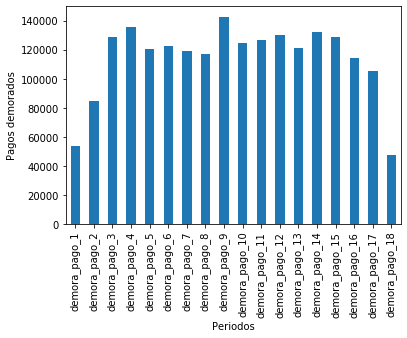

In [37]:
(df[[col for col in df.columns if "demora_pago" in col]] > 0).sum().plot.bar().set(xlabel="Periodos", ylabel="Pagos demorados")